In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics

import keras
import keras.layers as layers
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

import itertools 

In [2]:
data = pd.read_csv('processed_data.csv')

In [3]:
data.head()

,title,text,class,text_without_stopwords,title_without_stopwords,text_word_count,title_word_count,text_sentence_count,title_sentence_count,text_average_word_length,...,polarity,overall_content,Topic 1 Probability,Topic 2 Probability,Topic 3 Probbility,Topic 4 Probability,Topic 5 Probability,polarity_category,polarity_category_Neutral,polarity_category_Positive
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump wish americans happy new year lea...,donald trump sends out embarrassing new year’s...,516,13,28,1,4.804040,...,0.082132,donald trump sends out embarrassing new year’s...,0.002194,0.747636,0.001007,0.157660,0.091503,Positive,0,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,309,9,11,1,5.213115,...,-0.005004,drunk bragging trump staffer started russian c...,0.064904,0.244962,0.557051,0.002320,0.130763,Neutral,1,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,on friday revealed former milwaukee sheriff da...,sheriff david clarke becomes an internet joke ...,600,16,25,1,5.168966,...,-0.012345,sheriff david clarke becomes an internet joke ...,0.002488,0.433611,0.281460,0.001917,0.280524,Neutral,1,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,on christmas day donald trump announced would ...,trump is so obsessed he even has obama’s name ...,475,15,15,1,5.180180,...,-0.023118,trump is so obsessed he even has obama’s name ...,0.002963,0.788261,0.204377,0.002290,0.002109,Neutral,1,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis used annual christmas day message...,pope francis just called out donald trump duri...,434,12,19,1,4.554762,...,-0.011722,pope francis just called out donald trump duri...,0.292172,0.327938,0.001138,0.020911,0.357842,Neutral,1,0


In [4]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", 
                    "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                    "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                    "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",  "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
keys = contraction_dict.keys()

In [5]:
for i in range(len(data)):
    text = data['overall_content'].iloc[i]
    for word in keys:
        if word in data['overall_content'].iloc[i]:
            text = text.replace(word, contraction_dict[word])
        else:
            pass
    data.at[i, 'overall_content'] = text

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data['overall_content'],data['class'],test_size=0.2,random_state = 4222)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.25, random_state = 4222)
print(x_train)

30005    with opposition split venezuela mayoral vote s...
4439     revealed: trump illegally violated embargo aga...
8614     these veterans have some very choice words for...
33089    after air strike israeli minister warns arms s...
1628     watch: former reagan adviser is totally disgus...
                               ...                        
11694    woman who wants to become dnc chair: “my job s...
28257    kristie kenney named state department's new co...
4917     trump caught illegally buying $55000 worth of ...
30362    jordan's king warns trump moving us embassy je...
7947     this conservative wants to let scalia vote fro...
Name: overall_content, Length: 23194, dtype: object


(array([2.1596e+04, 1.4800e+03, 7.0000e+01, 2.4000e+01, 1.2000e+01,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([2.0000e+00, 5.1480e+02, 1.0276e+03, 1.5404e+03, 2.0532e+03,
        2.5660e+03, 3.0788e+03, 3.5916e+03, 4.1044e+03, 4.6172e+03,
        5.1300e+03]),
 <BarContainer object of 10 artists>)

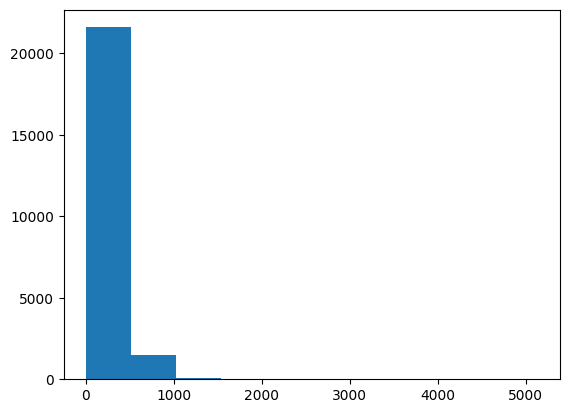

In [7]:
lst = []
words = []
for item in x_train:
    lst.append(len(item.split()))

big_list = [item.split() for item in x_train]
flat_list = [item for sublist in big_list for item in sublist]
unique = list(set(flat_list))

plt.hist(lst)

In [8]:
print(len(unique))
print(max(lst))

207339
5130


In [9]:
max_features = 10000
embed_size = 100
maxlen = [500,1000]
dense_units = [64,128]
gru_units = [64,128]

In [10]:
candidate_params = list(itertools.product(maxlen, gru_units, dense_units))

In [11]:
def tokenized_sets(maxlen):
    results = []
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(x_train.squeeze())
    tokenized_train = tokenizer.texts_to_sequences(x_train.squeeze())
    x_train_tokenized = pad_sequences(tokenized_train , maxlen=maxlen)
    results.append(x_train_tokenized)
    
    tokenized_validation = tokenizer.texts_to_sequences(x_validation)
    x_validation_tokenized = pad_sequences(tokenized_validation , maxlen=maxlen)
    results.append(x_validation_tokenized)
    
    tokenized_test = tokenizer.texts_to_sequences(x_test)
    x_test_tokenized = pad_sequences(tokenized_test , maxlen=maxlen)
    results.append(x_test_tokenized)
    
    return results

In [12]:
def gru_model(gru_units, dense_units):
    gru_model = keras.models.Sequential()
    gru_model.add(layers.Embedding(max_features, embed_size))

    gru_model.add(GRU(gru_units, return_sequences=False, dropout = 0.25, 
                      recurrent_dropout = 0.25, kernel_regularizer = regularizers.l2(0.0001)))
    gru_model.add(layers.Dropout(0.5))

    gru_model.add(layers.Dense(dense_units, activation='relu'))
    gru_model.add(layers.Dropout(0.5))
    gru_model.add(layers.Dense(1,activation="sigmoid",name="predictions"))

    gru_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    return gru_model

In [13]:
epochs = 3

early_stopping = EarlyStopping()

def make_predictions(tokenized_text, gru_model):
    gru_model.fit(tokenized_text[0], y_train,
                  validation_data = (tokenized_text[1], y_validation),
                  epochs = epochs,
                  callbacks = [early_stopping])
    y_pred = (gru_model.predict(tokenized_text[2]) >= 0.5).astype("int")
    return y_pred

In [14]:
for parameters in candidate_params:
    count = 1
    accuracy = 0
    best_params = []
    data = tokenized_sets(parameters[0])
    gru = gru_model(parameters[1], parameters[2])
    predictions = make_predictions(data, gru)
    accuracy_current = metrics.accuracy_score(y_test, predictions)
    if accuracy_current > accuracy:
        accuracy = accuracy_current
        best_params = parameters 
print(best_params)

Epoch 1/3
725/725 [==============================] - 562s 766ms/step - loss: 0.1400 - accuracy: 0.9524 - val_loss: 0.0756 - val_accuracy: 0.9831
Epoch 2/3
242/242 [==============================] - 22s 85ms/step
Epoch 1/3
725/725 [==============================] - 465s 635ms/step - loss: 0.1349 - accuracy: 0.9528 - val_loss: 0.0736 - val_accuracy: 0.9793
Epoch 2/3
242/242 [==============================] - 16s 63ms/step
Epoch 1/3
725/725 [==============================] - 940s 1s/step - loss: 0.1433 - accuracy: 0.9518 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 2/3
242/242 [==============================] - 36s 149ms/step
Epoch 1/3
725/725 [==============================] - 1017s 1s/step - loss: 0.1350 - accuracy: 0.9511 - val_loss: 0.0881 - val_accuracy: 0.9731
Epoch 2/3
725/725 [==============================] - 975s 1s/step - loss: 0.0344 - accuracy: 0.9910 - val_loss: 0.0789 - val_accuracy: 0.9771
Epoch 3/3
242/242 [==============================] - 38s 154ms/step
Epoch 1/3
725

In [19]:
final_sets = tokenized_sets(best_params[0])
final_gru_model = gru_model(best_params[1], best_params[2])

history = final_gru_model.fit(final_sets[0], y_train,
                              validation_data = (final_sets[1], y_validation),
                              epochs = epochs, 
                              callbacks = [early_stopping])
y_pred = (final_gru_model.predict(final_sets[2]) >= 0.5).astype("int")

Epoch 1/3
725/725 [==============================] - 2106s 3s/step - loss: 0.1385 - accuracy: 0.9512 - val_loss: 0.0662 - val_accuracy: 0.9819
Epoch 2/3
242/242 [==============================] - 113s 464ms/step


In [20]:
print("Performance on Test set:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))

Performance on Test set:
Accuracy: 0.9804707708225556
Precision: 0.9717992103778906
Recall: 0.9854160709179296
F1_score: 0.9785602726111033
